In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import zipfile
from pprint import pprint # to get a more easily-readable view.
import re
pd.set_option('display.max_colwidth', None)
from sklearn.linear_model import LinearRegression, HuberRegressor

In [2]:
lego = pd.read_csv('lego linear regression/lego_sets.csv')
lego.drop(['prod_desc', 'prod_long_desc', 'set_name', 'theme_name','country'], axis=1, inplace = True)
lego.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_id,review_difficulty,star_rating,val_star_rating
0,6-12,29.99,2.0,277.0,4.0,75823.0,Average,4.5,4.0
1,6-12,19.99,2.0,168.0,4.0,75822.0,Easy,5.0,4.0
2,6-12,12.99,11.0,74.0,4.3,75821.0,Easy,4.3,4.1
3,12+,99.99,23.0,1032.0,3.6,21030.0,Average,4.6,4.3
4,12+,79.99,14.0,744.0,3.2,21035.0,Challenging,4.6,4.1


In [3]:
lego.shape

(12261, 9)

In [4]:
lego.dropna(inplace = True)

In [5]:
lego.shape

(10165, 9)

In [6]:
X = lego['piece_count'].values.reshape(-1,1)
Y = lego['list_price'].values.reshape(-1,1)

In [7]:
model = LinearRegression()

In [8]:
model.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
print(f'intercept: {model.intercept_[0]}')

intercept: 16.957149182979812


In [10]:
weight_pieces = model.coef_[0][0]
print(f"Estimated weight for pieces feature: {weight_pieces}")

Estimated weight for pieces feature: 0.09707970021082521


In [11]:
Y_Predictor = model.predict(X)
new_sample = np.array([[3000]])
print(model.predict(new_sample)[0][0])

308.1962498154555


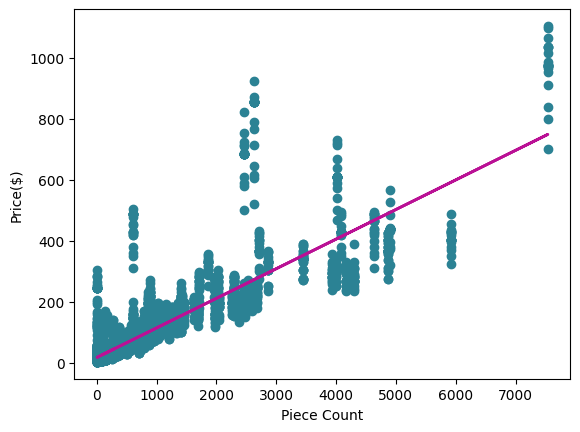

In [12]:
plt.scatter(X, Y, color = "#2b8294")
plt.plot(X, Y_Predictor, color = "#ba1195", linewidth=2)
plt.xlabel("Piece Count")
plt.ylabel("Price($)")
plt.show()

In [13]:
huber = HuberRegressor(epsilon=8.7)
huber.fit(X,np.ravel(Y))
print("Huber Regressor Coefficients:", huber.coef_[0])

Huber Regressor Coefficients: 0.09606172113163039


In [14]:
HuberY_Predict = huber.predict(X)
new_sample = np.array([[200]])
print(huber.predict(new_sample)[0])

36.32946403931474


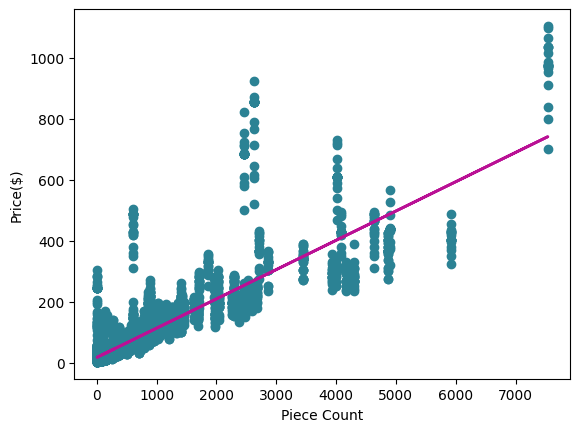

In [15]:
plt.scatter(X, Y, color = "#2b8294")
plt.plot(X, HuberY_Predict, color = "#ba1195", linewidth=2)
plt.xlabel("Piece Count")
plt.ylabel("Price($)")
plt.show()

In [16]:
challenge_mapping = {'Very Easy' : 1, 'Easy' : 2, 'Average' : 3, 'Challenging' : 4, 'Very Challenging' : 5}
lego['review_difficulty'] = lego['review_difficulty'].map(challenge_mapping)
lego.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_id,review_difficulty,star_rating,val_star_rating
0,6-12,29.99,2.0,277.0,4.0,75823.0,3,4.5,4.0
1,6-12,19.99,2.0,168.0,4.0,75822.0,2,5.0,4.0
2,6-12,12.99,11.0,74.0,4.3,75821.0,2,4.3,4.1
3,12+,99.99,23.0,1032.0,3.6,21030.0,3,4.6,4.3
4,12+,79.99,14.0,744.0,3.2,21035.0,4,4.6,4.1


In [17]:
X = lego[['piece_count', 'review_difficulty']].values.reshape(-1,2)
Y = lego['list_price'].values.reshape(-1,1)

In [18]:
multRegModel = HuberRegressor()

In [19]:
multRegModel.fit(X,np.ravel(Y))

,epsilon,1.35
,max_iter,100
,alpha,0.0001
,warm_start,False
,fit_intercept,True
,tol,1e-05


In [20]:
multRegModel.predict(X)
new_sample = np.array([[200,1]])
print(multRegModel.predict(new_sample))

[24.94178299]


In [21]:
Xvals = np.linspace(min(lego['piece_count']), max(lego['piece_count']),10)
Yvals = np.linspace(min(lego['review_difficulty']), max(lego['review_difficulty']), 10)
Xg, Yg = np.meshgrid(Xvals, Yvals)
Zvals = np.array(multRegModel.intercept_ + (Xg * multRegModel.coef_[0] + Yg * multRegModel.coef_[1]))

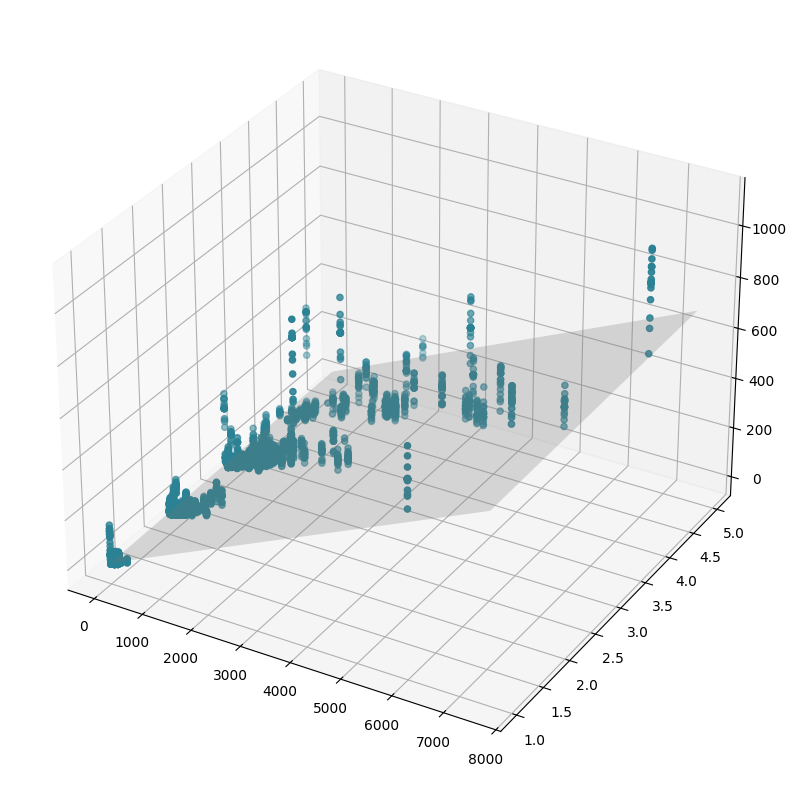

In [23]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection = '3d')
ax.grid()
ax.scatter(lego[['piece_count']], lego[['review_difficulty']], lego[['list_price']], color = '#2b8294')
ax.plot_surface(Xg,Yg, Zvals, alpha = 0.25, color = 'gray')